# Importing libraries:

**Matplotlib for inclusive use of imread and image_show:**

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage import io
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import skimage.segmentation as seg

import cv2

**Importing gray image from sklear.data:**

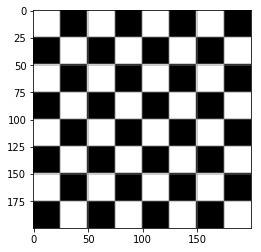

In [3]:
image = data.checkerboard()
# image = data.binary_blobs() or image = data.camera()		
plt.imshow(image, cmap = 'gray')

**Importing color image from sklearn.data:**

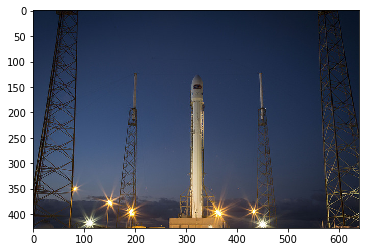

In [4]:
image = data.rocket()
# image = data.logo() or image = data.astronaut()
plt.imshow(image)

**Import a color image using a global URL:**

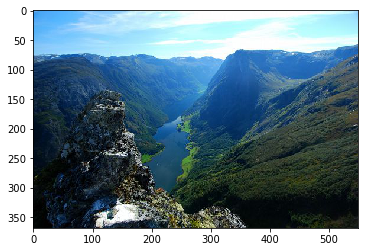

In [5]:
image = io.imread('https://www.gstatic.com/webp/gallery/1.jpg')
plt.imshow(image)

**Importing multiple images from local directory:**

In [6]:
image_array = io.ImageCollection('../images/*.png:../images/*.jpg')
print('Type: ', type(image_array))

Type:  <class 'skimage.io.collection.ImageCollection'>


**Customized function to show images:**

In [0]:
# Returns 2 parameters figuree and axx; the outputs of plt.subplots()
def show_image(image_object, no_of_rows = 1, no_of_cols = 1, cmap = 'gray'):
		# Can change size of subplots from 15x15 to anything else desired.
		figuree, axx = plt.subplots(nrows = no_of_rows, ncols = no_of_cols, figsize = (15, 15))
		axx = imshow(image_object, cmap = 'gray')
		axx.axis('off')
		return figuree, axx

**General thresholding:**

[[[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 ...

 [[False False False]
  [False False False]
  [False False False]
  ...
  [ True  True  True]
  [ True  True  True]
  [ True  True  True]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [ True False False]
  [ True False False]
  [False False False]]

 [[False False False]
  [False False False]
  [False False False]
  ...
  [ True False False]
  [False False False]
  [ True False False]]]


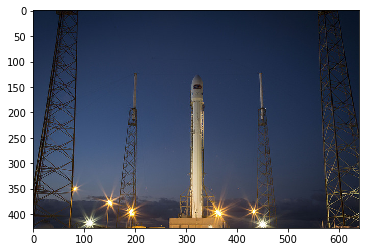

In [29]:
rock = data.rocket()
plt.imshow(rock);

# Only have pixels greater than 40 intensity value
rock_seg40 = rock>40
# plt.imshow(rock_seg40);

rock_seg80 = rock>80
print(rock_seg80)
# plt.imshow(rock_seg80);

rock_seg120 = rock>120
# plt.imshow(rock_seg120);

**Generate circle to create a snake around it:**

In [0]:
def generate_circle(res, center, radius):
		rads = np.linspace(0, 2*np.pi, res)

		c = center[1] + radius*np.cos(rads)
		r = center[0] + radius*np.sin(rads)
	
		return np.array([c, r]).T	

# Optimization in unsupervised segmentation:

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x27700553be0>)

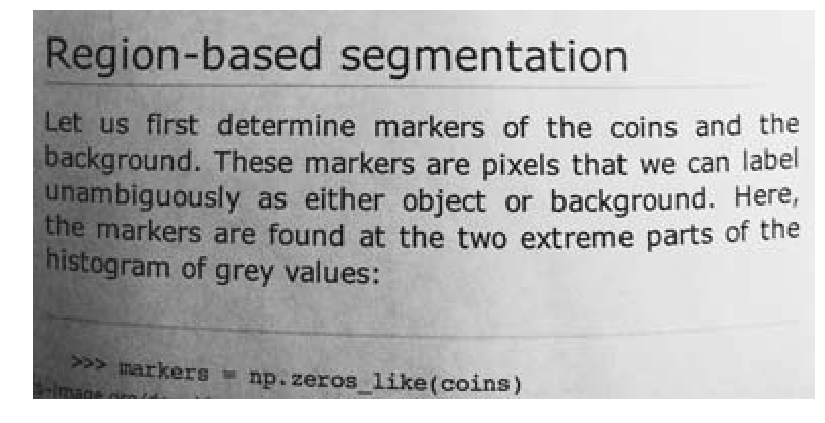

In [0]:
text = data.page()
image_show(text)

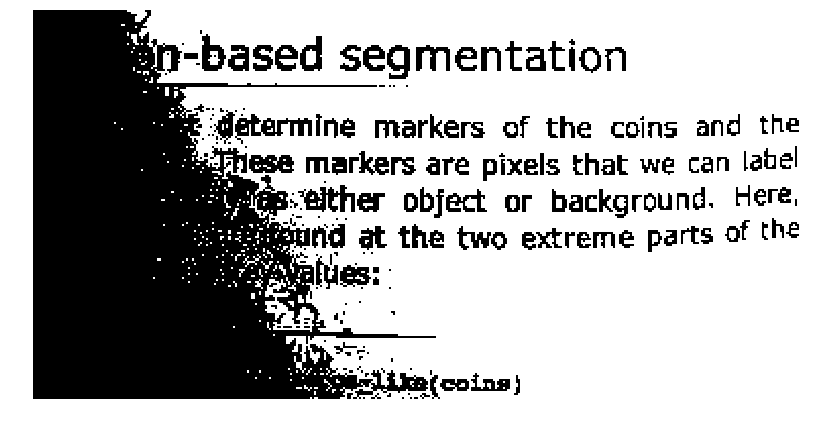

In [0]:
text_threshold = filters.threshold_otsu(text) 

image_show(text > text_threshold);

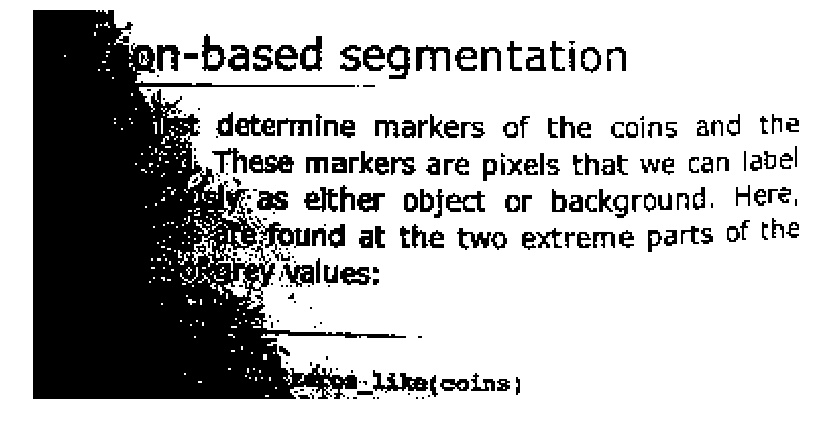

In [0]:
text_threshold = filters.threshold_li(text)

image_show(text > text_threshold);

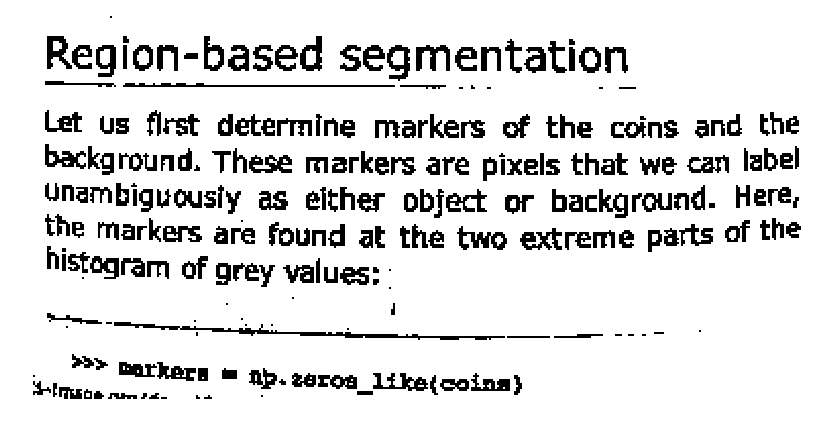

In [0]:
text_threshold = filters.threshold_local(text,block_size=51, offset=10) 
image_show(text > text_threshold);

# Optimization in snake based contour segmentation:

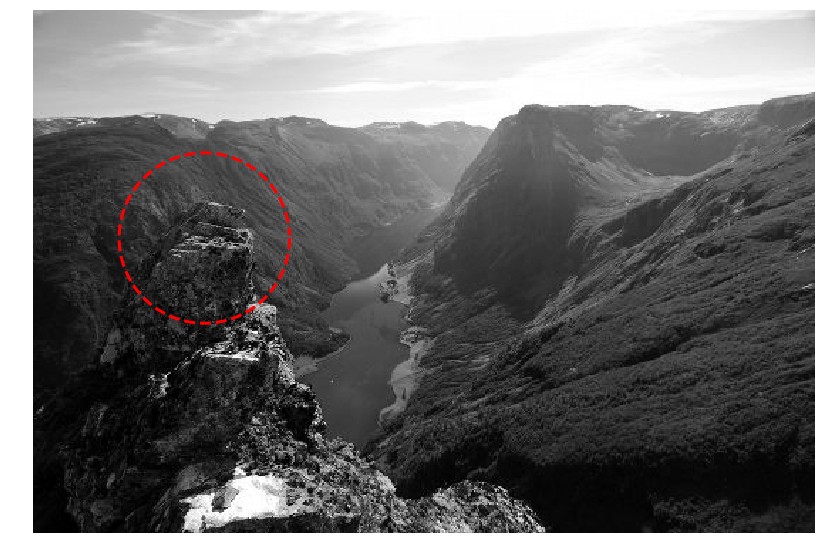

In [0]:
points = generate_circle(200, [160, 120], 60)[:-1]
fig, ax = image_show(image_gray)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

**Generating snake based on circle:**

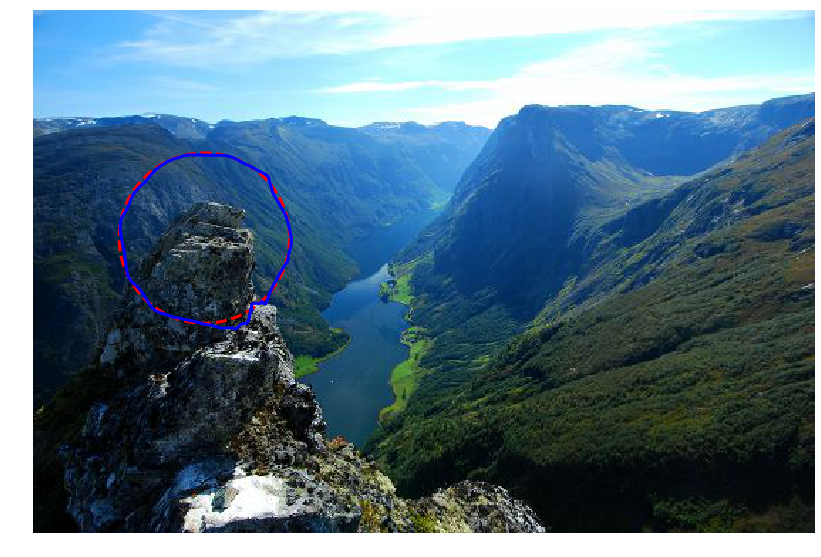

In [0]:
import skimage.segmentation as seg
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

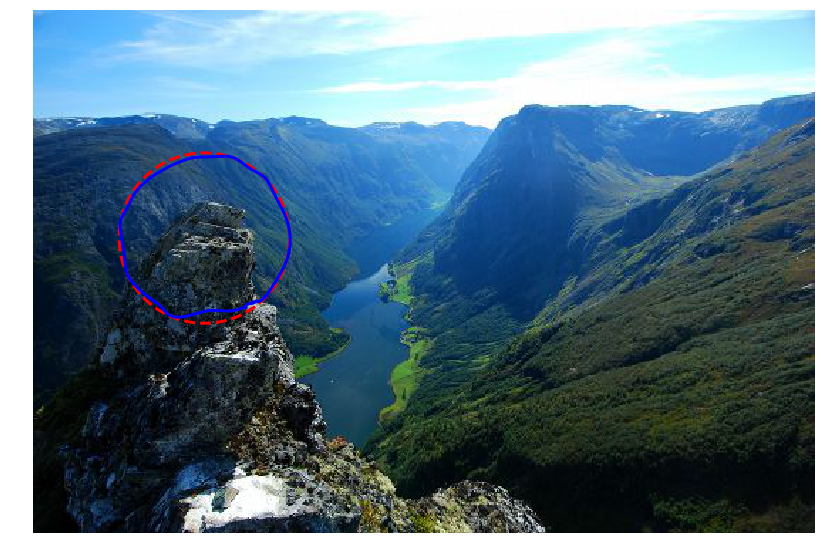

In [0]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

# Optimization  in Linear Iterative Clustering:

In [0]:
imagee = io.imread('https://www.gstatic.com/webp/gallery/1.jpg')
image_slice = seg.slic(imagee, n_segments = 255)

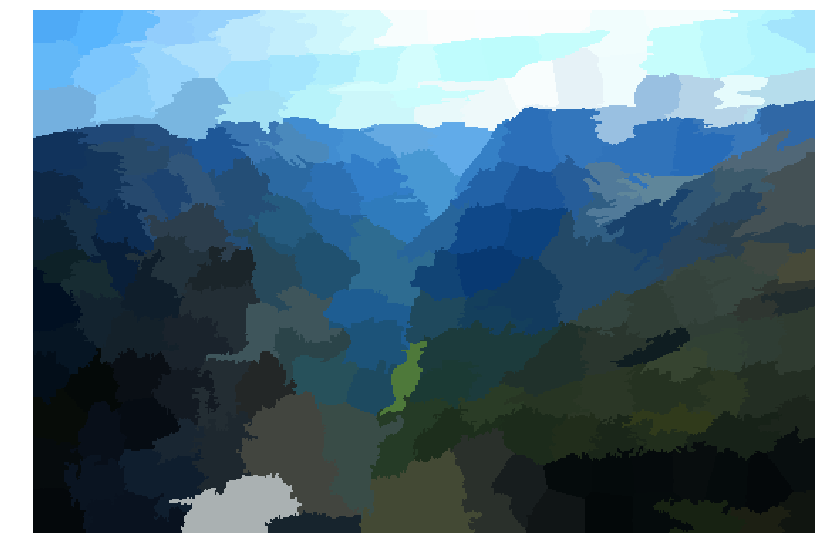

In [0]:
# label2rgb replaces each discrete label with the average interior color
image_show(color.label2rgb(image_slic, image, kind='avg'));

# Optimization in Felzenszwalb Segmentation:

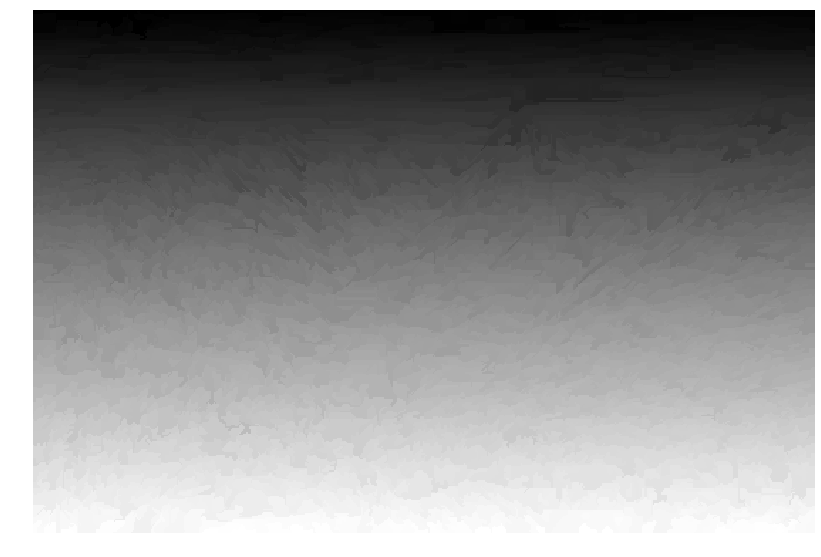

In [0]:
image_felzenszwalb = seg.felzenszwalb(image) 
image_show(image_felzenszwalb);

In [0]:
np.unique(image_felzenszwalb).size

2851

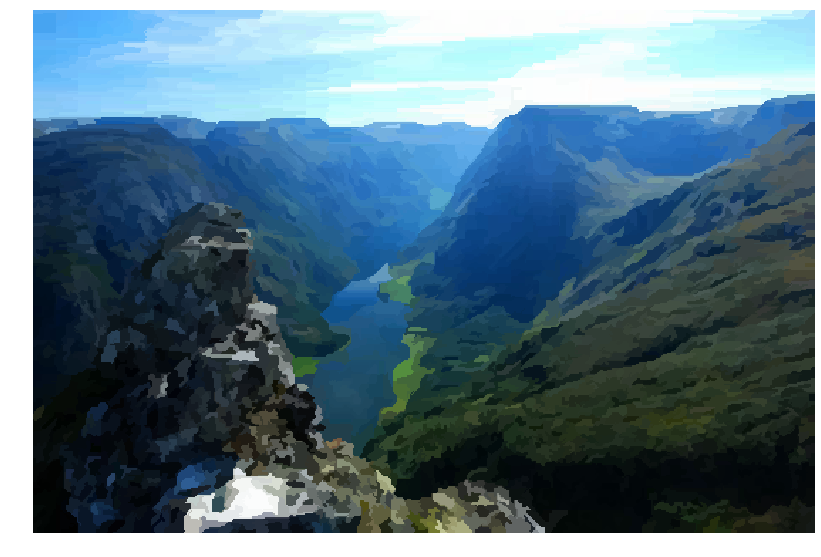

In [0]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored);

**Utility function for a generalized optimization:**

In [0]:
def image_show(image_object):
	# Filter matrix for an 8x8 image with mostly positive intensity values
	single_88_positive = {
		{0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0},
		{5.0,  5.0,  5.0,  5.0,  5.0,  5.0,  5.0,  5.0},
		{1.0,  1.0,  2.0,  3.0,  3.0,  2.0,  1.0,  1.0},
		{0.5,  0.5,  1.0,  2.5,  2.5,  1.0,  0.5,  0.5},
		{0.0,  0.0,  0.0,  2.0,  2.0,  0.0,  0.0,  0.0},
		{0.5, -0.5, -1.0,  0.0,  0.0, -1.0, -0.5,  0.5},
		{0.5,  1.0, 1.0,  -2.0, -2.0,  1.0,  1.0,  0.5},
		{0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0}
	};

	# Filter for absorbing edges and curves using negative intensity values
	single_88_negative = {
		{ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0},
		{ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0},
		{ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0},
		{ -3.0, -4.0, -4.0, -5.0, -5.0, -4.0, -4.0, -3.0},
		{ -2.0, -3.0, -3.0, -4.0, -4.0, -3.0, -3.0, -2.0},
		{ -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.0},
		{  2.0,  2.0,  0.0,  0.0,  0.0,  0.0,  2.0,  2.0 },
		{  2.0,  3.0,  1.0,  0.0,  0.0,  1.0,  3.0,  2.0 }
	};

	image_object = filters.normalize(alpha = 0.01, beta = 0.1, scale = 'absolute')
	image_object_gray = color.rgb2gray(image_object)
	absolute_best_segmented_image = NULL
	no_of_segments_in_abs_best = 1
	iterations_till_now_for_t = 0

	for(t in range(25, max(image_object_gray))):
		try:
			new_segmented_image = seg.inverse_gaussian_gradient(image_object_gray)
			selected_threshold = t
			iterations_till_now_for_s = 0
			for(s in range(1, 255)):
				single_88_positive_image = new_segmented_image.filter(single_88_positive)
				single_88_negative_image = new_segmented_image.filter(single_88_negative)
				new_segmented_image = min(single_88_positive_image, single_88_negative_image)
				new_segmented_image = seg.join_segmentations(image_object_gray, new_segmented_image)
				if(quality(new_segmented_image) > quality(absolute_best_segmented_image)):
					absolute_best_segmented_image = new_segmented_image
					no_of_segments_in_abs_best = s
					iterations_till_now_for_s += 1
			iterations_till_now_for_t += 1
		except:
			print("Error: Finding optimized image is not possible for given image.")
		finally:
			print("No runtime error till now, internally.")

	return absolute_best_segmented_image, no_of_segments_in_abs_best